In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Digital_image').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head(14)



,input,output
0,1.0,8.0
1,2.0,13.0
2,3.0,18.0
3,4.0,23.0
4,5.0,28.0
5,6.0,33.0
6,7.0,38.0
7,8.0,43.0
8,9.0,48.0
9,10.0,53.0


In [5]:
X = df[['input']].values
y = df[['output']].values


In [6]:
Scaler = MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [7]:
model = Sequential([
Dense(17,activation = 'relu',input_shape=[1]),
Dense(10,activation = 'relu'),
Dense(1)
])

In [9]:
model.compile(optimizer='rmsprop',loss = 'mse')
model.fit(X_train1,y_train,epochs=2000)
model.fit(X_train,y_train,epochs=2000)


Streaming output truncated to the last 5000 lines.
Epoch 961/2000
1/1 [==============================] - 0s 8ms/step - loss: 290.0779
Epoch 962/2000
1/1 [==============================] - 0s 7ms/step - loss: 288.1761
Epoch 963/2000
1/1 [==============================] - 0s 7ms/step - loss: 286.2928
Epoch 964/2000
1/1 [==============================] - 0s 6ms/step - loss: 284.4284
Epoch 965/2000
1/1 [==============================] - 0s 9ms/step - loss: 282.5829
Epoch 966/2000
1/1 [==============================] - 0s 9ms/step - loss: 280.7560
Epoch 967/2000
1/1 [==============================] - 0s 11ms/step - loss: 278.9481
Epoch 968/2000
1/1 [==============================] - 0s 6ms/step - loss: 277.1593
Epoch 969/2000
1/1 [==============================] - 0s 10ms/step - loss: 275.3896
Epoch 970/2000
1/1 [==============================] - 0s 9ms/step - loss: 273.6390
Epoch 971/2000
1/1 [==============================] - 0s 8ms/step - loss: 271.9076
Epoch 972/2000
1/1 [==============

<AxesSubplot:>

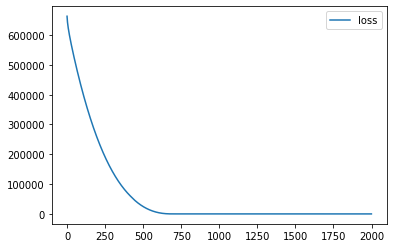

In [10]:
loss_plot = pd.DataFrame(model.history.history)
loss_plot.plot()

In [11]:
err = rmse()
preds = model.predict(X_test)
err(y_test,preds)

1/1 [==============================] - 0s 137ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.82056814>

In [12]:
x_n1 = [[40]]
x_n_n = Scaler.transform(x_n1)
model.predict(x_n_n)

1/1 [==============================] - 0s 28ms/step


array([[13.99001]], dtype=float32)